In [ ]:
#https://www.r-bloggers.com/beautiful-tables-for-linear-model-summaries-rstats/
install.packages("sjPlot",repos = "https://mirror.aarnet.edu.au/pub/CRAN/", dependencies = TRUE)
#http://www.sthda.com/english/wiki/impressive-package-for-3d-and-4d-graph-r-software-and-data-visualization
install.packages("plot3D", repos = "https://mirror.aarnet.edu.au/pub/CRAN/")


In [1]:
#setwd("C:\\Users\\nico\\Google Drive\\2. UTAS\\2017 Sem 2\\KMA253 - Data Handling & Statistics 2\\Assessments\\Project 1")
setwd("D:\\Google Drive\\2. UTAS\\2017 Sem 2\\KMA253 - Data Handling & Statistics 2\\Assessments\\Project 1")
fjords.original <- read.csv('project_1_fjords.csv', header = TRUE)
fjords<-fjords.original
fjords$ID <- seq.int(nrow(fjords.original))
head(fjords)

# Split data accordint to region (NZ or BC)
fjords.NZ <- fjords[fjords$region=='NZ',seq(2,5)]
fjords.BC <- fjords[fjords$region=='BC',seq(2,5)]

region,area,length,width,ID
BC,690,24.4,1.18,1
BC,825,18.8,1.36,2
BC,709,28.8,1.11,3
BC,1137,13.8,1.49,4
BC,6793,88.8,2.27,5
BC,413,13.0,1.57,6


## Look at data

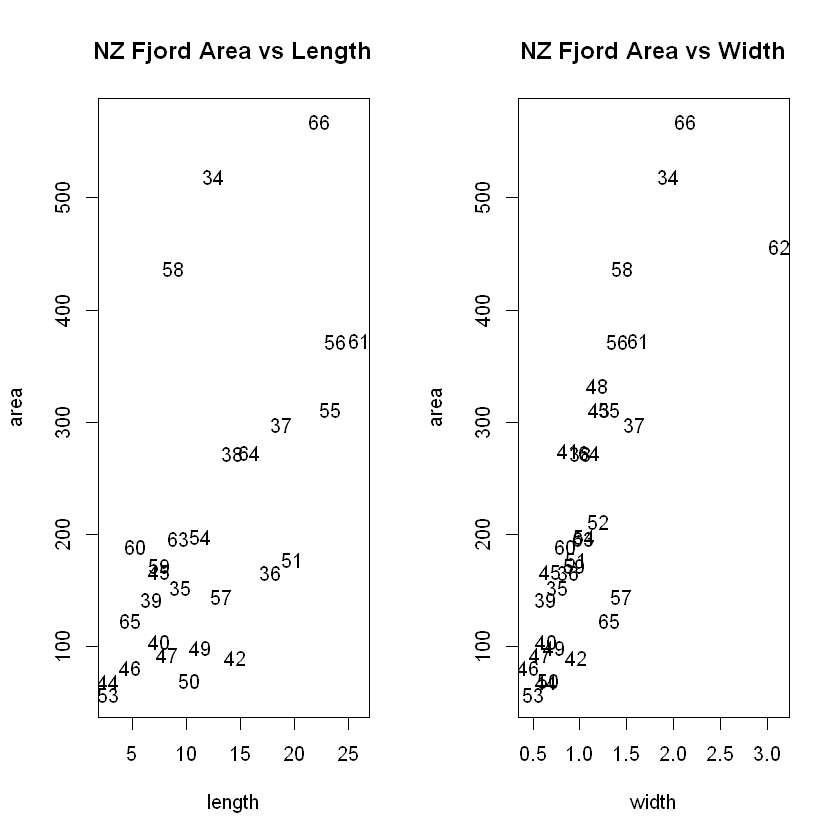

In [34]:
par(mfrow=c(1,2))

plot(area~length, data = fjords.NZ, type="n", main="NZ Fjord Area vs Length")
text(area~length,data=fjords.NZ, labels =fjords.NZ$ID)

plot(area~width, data = fjords.NZ, type="n", main="NZ Fjord Area vs Width")
text(area~width,data=fjords.NZ, labels =fjords.NZ$ID)

par(mfrow=c(1,1))

# Correlation matrix table

In [19]:
cor(fjords.NZ[complete.cases(fjords.NZ),seq(1,3)])

,area,length,width
area,1.0000000,0.6123602,0.8829748
length,0.6123602,1.0000000,0.6405454
width,0.8829748,0.6405454,1.0000000


length:width is below .80

### NZ ($width+length+width:length$)  - with all data
Adjusted R-squared:  0.7675

Length non-significant


Call:
lm(formula = area ~ width + length + width:length, data = fjords.NZ)

Residuals:
     Min       1Q   Median       3Q      Max 
-163.413  -24.614    3.998   39.113  139.829 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)   -16.381     70.815  -0.231   0.8190  
width         196.946     72.516   2.716   0.0121 *
length         -4.304      6.065  -0.710   0.4848  
width:length    5.145      4.774   1.078   0.2918  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 66.31 on 24 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.7934,	Adjusted R-squared:  0.7675 
F-statistic: 30.71 on 3 and 24 DF,  p-value: 2.197e-08


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
width,1,398141.947,398141.947,90.5499112,1.284206e-09
length,1,1894.661,1894.661,0.4309051,5.177902e-01
width:length,1,5108.089,5108.089,1.1617390,2.918199e-01
Residuals,24,105526.406,4396.934,NA,NA


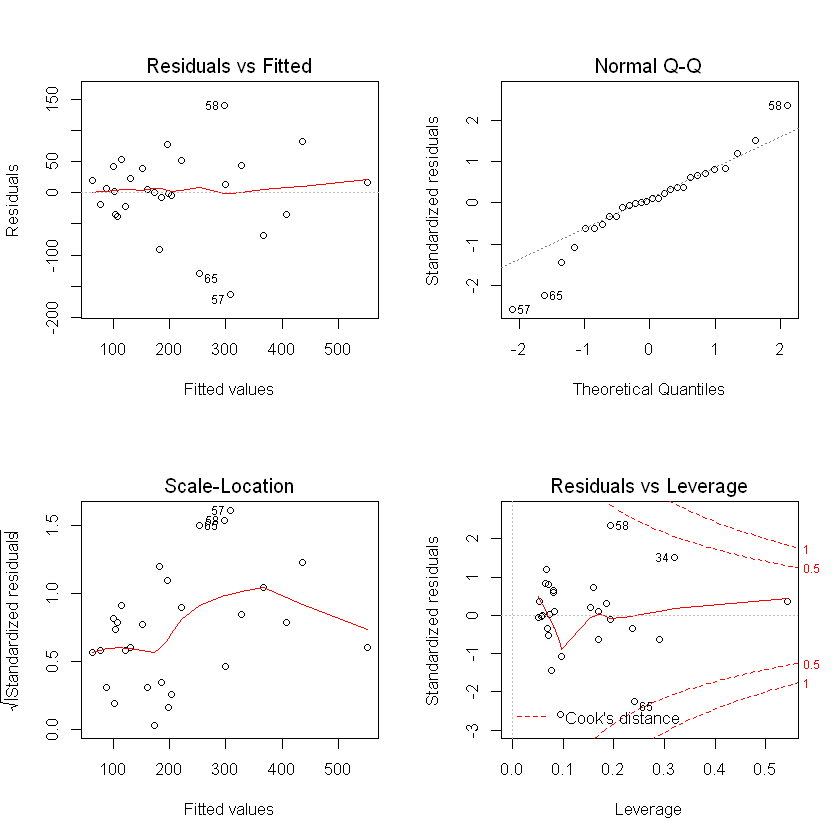

In [6]:
fit.NZ <- lm(area~width+length,data=fjords.NZ)
summary(fit.NZ)

par(mfrow=c(2,2))
plot(fit.NZ)
par(mfrow=c(1,1))

anova(fit.NZ)

### NZ ($width$)  - with all data
Adjusted R-squared:  0.6554 


Call:
lm(formula = area ~ width, data = fjords.NZ)

Residuals:
    Min      1Q  Median      3Q     Max 
-183.56  -32.99  -12.42   49.00  140.98 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.295     32.240  -0.040    0.968    
width        204.906     26.050   7.866 7.06e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 79.76 on 31 degrees of freedom
Multiple R-squared:  0.6662,	Adjusted R-squared:  0.6554 
F-statistic: 61.87 on 1 and 31 DF,  p-value: 7.056e-09


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
width,1,393608.9,393608.874,61.87061,7.056214e-09
Residuals,31,197216.0,6361.806,NA,NA


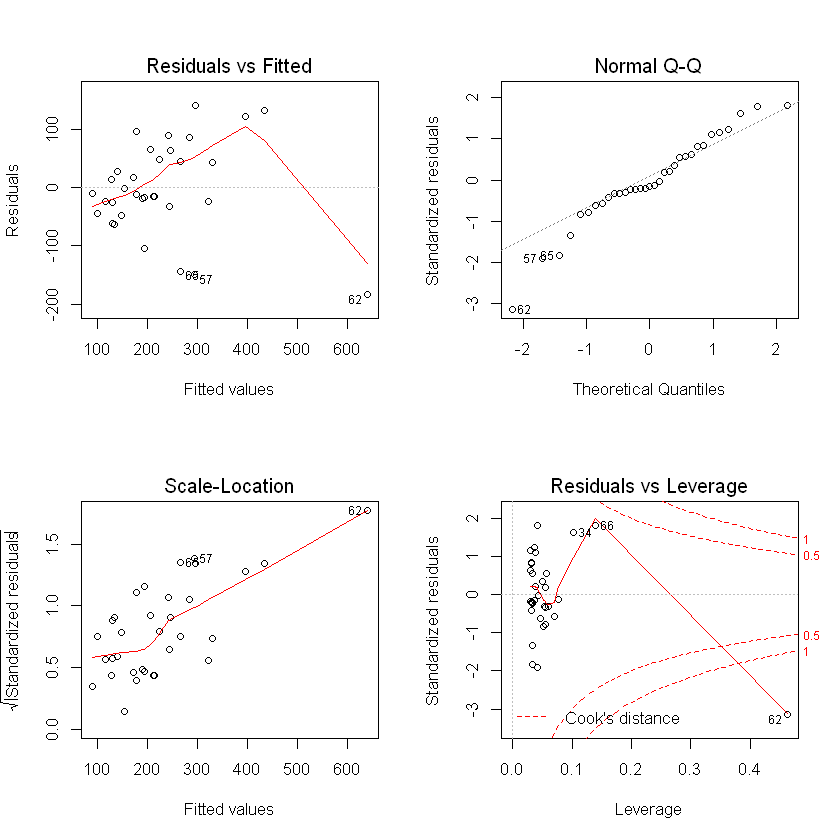

In [17]:
#removeIDs <- c('65', '57', '42', '37','58')
fit.NZ <- lm(area~width,data=fjords.NZ)
summary(fit.NZ)

par(mfrow=c(2,2))
plot(fit.NZ)
par(mfrow=c(1,1))

anova(fit.NZ)

In [18]:
summary(influence.measures(fit.NZ))

Potentially influential observations of
	 lm(formula = area ~ width, data = fjords.NZ) :

   dfb.1_  dfb.wdth dffit   cov.r cook.d  hat    
62  2.64_* -3.35_*  -3.47_*  0.92  4.24_*  0.46_*


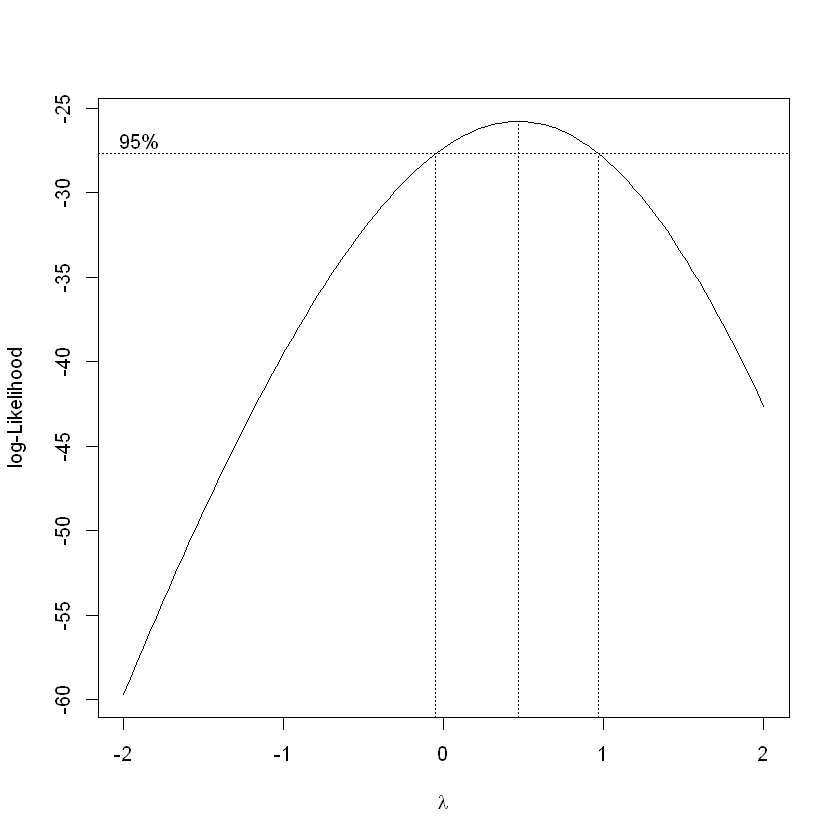

In [6]:
library(MASS)
boxcox(area~width,data=fjords.NZ)

Suggests log or sqrt transform - confidence interval just misses 1 (no transform)

### NZ ($width + width^2$)  - with all data
Residual standard error: 72.19 on 30 degrees of freedom  
Adjusted R-squared:  0.7177  
Note - $width^3$ non-significant


Call:
lm(formula = area ~ width + I(width^2), data = fjords.NZ)

Residuals:
     Min       1Q   Median       3Q      Max 
-183.343  -32.312    6.615   46.718  118.426 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -144.61      58.92  -2.454  0.02014 *  
width         431.27      84.22   5.121 1.66e-05 ***
I(width^2)    -71.51      25.54  -2.800  0.00886 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 72.19 on 30 degrees of freedom
Multiple R-squared:  0.7354,	Adjusted R-squared:  0.7177 
F-statistic: 41.68 on 2 and 30 DF,  p-value: 2.187e-09


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
width,1,393608.87,393608.874,75.520737,1.081197e-09
I(width^2),1,40858.07,40858.071,7.839334,8.855683e-03
Residuals,30,156357.93,5211.931,NA,NA


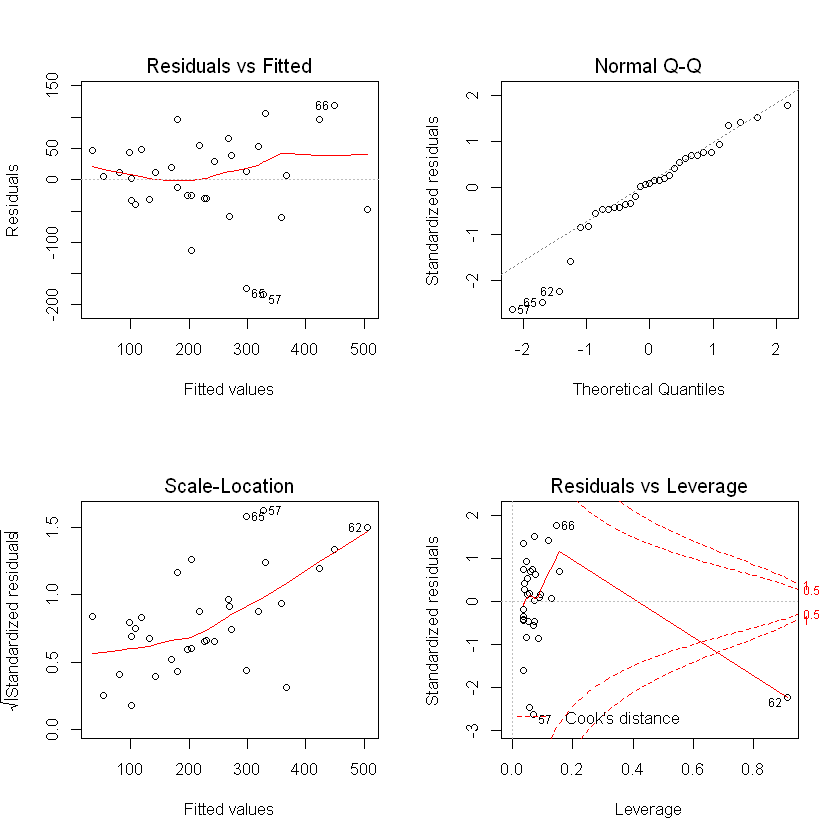

In [40]:
fit.NZ <- lm(area~width+I(width^2),data=fjords.NZ)
summary(fit.NZ)

par(mfrow=c(2,2))
plot(fit.NZ)
par(mfrow=c(1,1))

anova(fit.NZ)

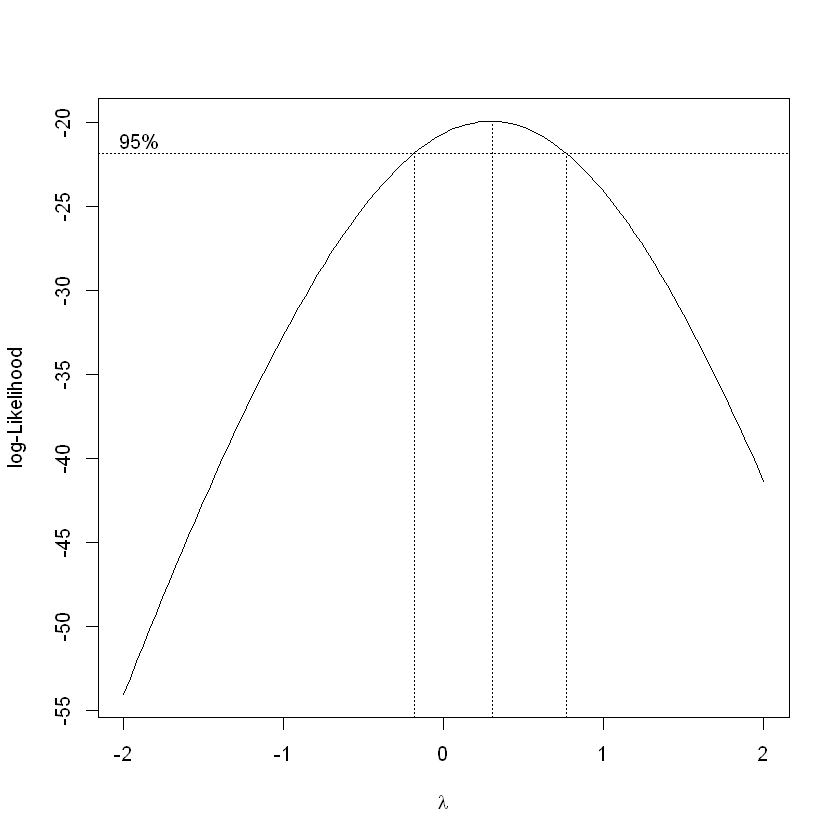

In [10]:
boxcox(area~width+I(width^2),data=fjords.NZ)

Still suggests log or sqrt transform (further than 1 now)

#### Anova (nested f test) to compare with previous model

In [31]:
anova(lm(area~width,data=fjords.NZ),lm(area~width+I(width^2),data=fjords.NZ))

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
31,197216.0,NA,NA,NA,NA
30,156357.9,1,40858.07,7.839334,0.008855683


### NZ ($\log (area) = width + width^2$)  - with all data  
Adjusted R-squared:  0.6999 


Call:
lm(formula = log(area) ~ width + I(width^2), data = fjords.NZ)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7986 -0.1326  0.0186  0.2402  0.5732 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.3332     0.2786  11.963 6.02e-13 ***
width         2.3566     0.3982   5.918 1.76e-06 ***
I(width^2)   -0.4680     0.1208  -3.875 0.000538 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3414 on 30 degrees of freedom
Multiple R-squared:  0.7187,	Adjusted R-squared:  0.6999 
F-statistic: 38.31 on 2 and 30 DF,  p-value: 5.479e-09


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
width,1,7.180801,7.1808014,61.61467,9.265239e-09
I(width^2),1,1.749856,1.7498564,15.01459,5.379342e-04
Residuals,30,3.496311,0.1165437,NA,NA


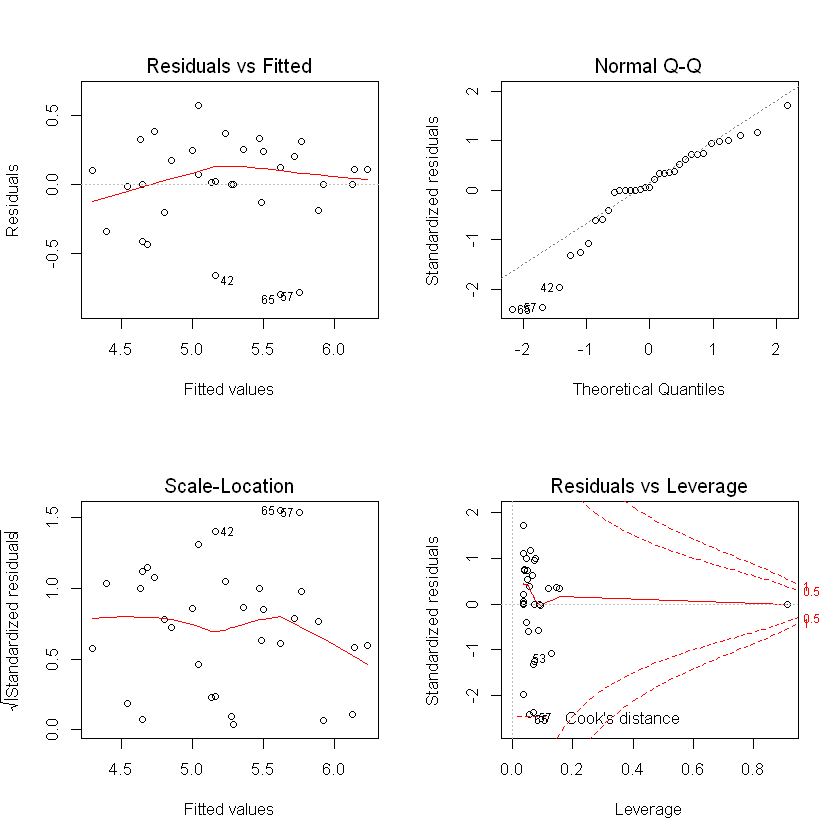

In [13]:
fit.NZ <- lm(log(area)~width+I(width^2),data=fjords.NZ)
summary(fit.NZ)

par(mfrow=c(2,2))
plot(fit.NZ)
par(mfrow=c(1,1))

anova(fit.NZ)

### NZ ($\sqrt{area} = width + width^2$)  - with all data  
Adjusted R-squared:  0.7207  
Residual standard error: 2.33

With 62 removed - Residual standard error: 2.32 - Adjusted R-squared:  0.7087  
and width^2 becomes non significant


Call:
lm(formula = sqrt(area) ~ width + I(width^2), data = fjords.NZ)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8744 -0.9551  0.1079  1.6762  3.6628 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.5117     1.9018   0.795  0.43294    
width        15.4709     2.7184   5.691 3.31e-06 ***
I(width^2)   -2.8367     0.8244  -3.441  0.00173 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.33 on 30 degrees of freedom
Multiple R-squared:  0.7382,	Adjusted R-squared:  0.7207 
F-statistic: 42.29 on 2 and 30 DF,  p-value: 1.862e-09


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
width,1,395.00651,395.00651,72.74427,1.620902e-09
I(width^2),1,64.29433,64.29433,11.84042,1.726577e-03
Residuals,30,162.90211,5.43007,NA,NA


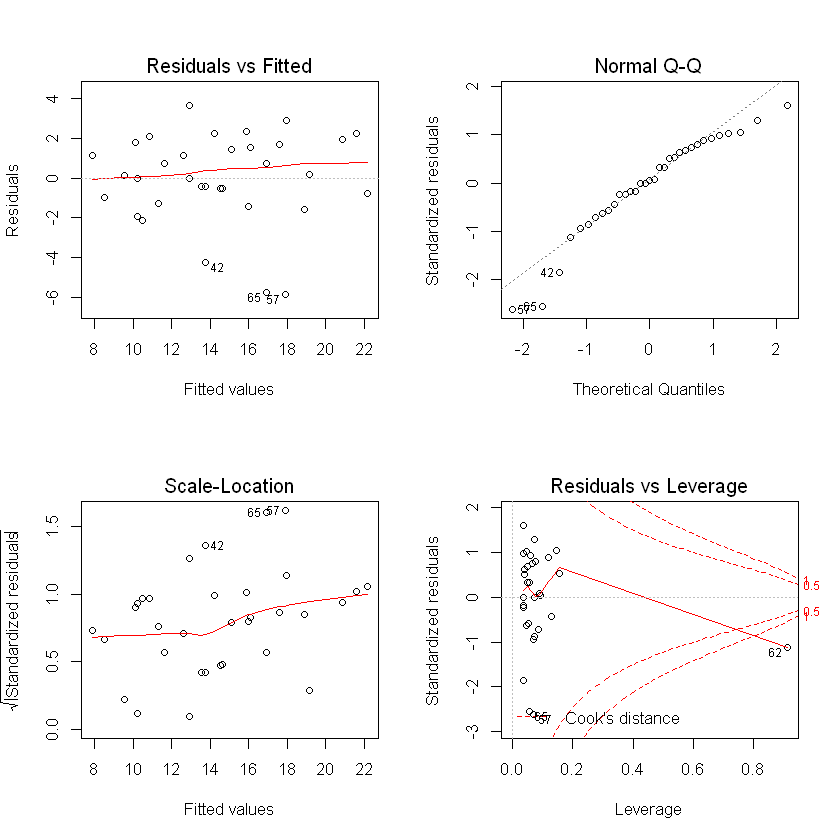

In [6]:
fit.NZ <- lm(sqrt(area)~width+I(width^2),data=fjords.NZ)
summary(fit.NZ)

par(mfrow=c(2,2))
plot(fit.NZ)
par(mfrow=c(1,1))

anova(fit.NZ)

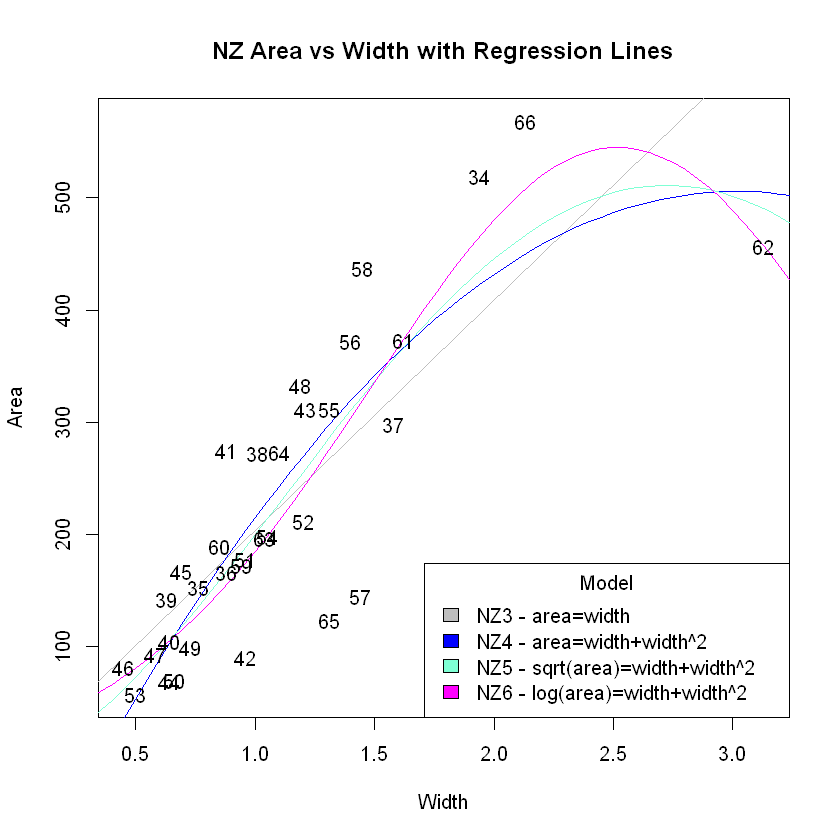

In [32]:
fit.NZ <- lm(area~width,data=fjords.NZ)
fit.NZ2<- lm(area~width+I(width^2)+I(width^2),data=fjords.NZ)

fit.NZ3<- lm(sqrt(area)~width+I(width^2)+I(width^2),data=fjords.NZ)
fit.NZ4<- lm(log(area)~width+I(width^2),data=fjords.NZ)

plot(area~width,type="n",data=fjords.NZ,
     ylab="Area", xlab="Width", main="NZ Area vs Width with Regression Lines")
abline(fit.NZ, col="gray")

density <- seq(0,4,.05)
pr <- predict(fit.NZ2,data.frame(width=density))
lines(density,pr,col="blue")

density <- seq(0,4,.05)
pr <- predict(fit.NZ3,data.frame(width=density))
lines(density,pr^2,col="aquamarine")

density <- seq(0,4,.05)
pr <- predict(fit.NZ4,data.frame(width=density))
lines(density,exp(pr),col="magenta")



text(area~width,data=fjords.NZ, labels =fjords.NZ$ID)

par(xpd=TRUE)

legend("bottomright", c("NZ3 - area=width","NZ4 - area=width+width^2","NZ5 - sqrt(area)=width+width^2", "NZ6 - log(area)=width+width^2"), fill=c("gray","blue","aquamarine", "magenta"), 
      title = "Model")
par(xpd=FALSE)

### NZ ($width$ + $width^2$)  - with 62 removed
Residual standard error: 67.02  
Adjusted R-squared:  0.7406 

> $width$ and $width^2$ are now non-significant


Call:
lm(formula = area ~ width + I(width^2), data = fjords.NZ[!(fjords.NZ$ID %in% 
    c("62")), ])

Residuals:
    Min      1Q  Median      3Q     Max 
-175.66  -28.00   -2.53   35.01  113.29 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   -1.068     80.864  -0.013    0.990
width        141.632    143.368   0.988    0.331
I(width^2)    56.701     58.239   0.974    0.338

Residual standard error: 67.02 on 29 degrees of freedom
Multiple R-squared:  0.7573,	Adjusted R-squared:  0.7406 
F-statistic: 45.25 on 2 and 29 DF,  p-value: 1.21e-09


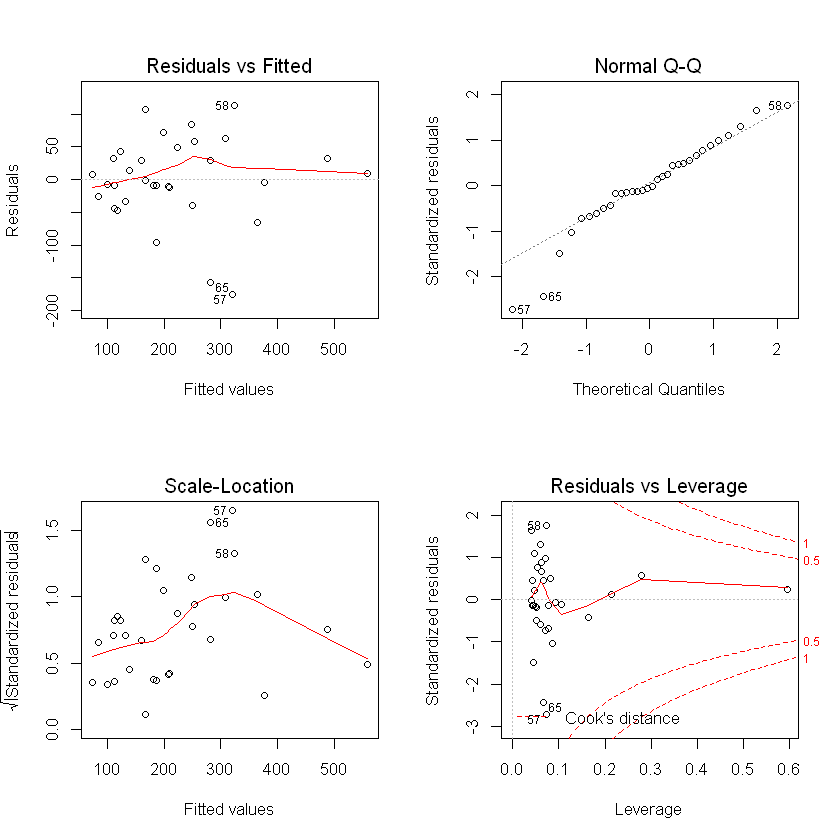

In [43]:
fit.NZ <- lm(area~width+I(width^2),data=fjords.NZ[!(fjords.NZ$ID %in% c('62')),])
summary(fit.NZ)

par(mfrow=c(1,4))
plot(fit.NZ)
par(mfrow=c(1,1))

### NZ ($width$)  - with 62 removed
$ area = -72.86 + 278.25*width $  
Residual standard error: 66.96  
Adjusted R-squared:  0.741 

all transformations on Y or X made it worse


Call:
lm(formula = area ~ width, data = fjords.NZ[!(fjords.NZ$ID %in% 
    c("62")), ])

Residuals:
     Min       1Q   Median       3Q      Max 
-183.010  -23.135    1.784   47.440  106.207 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -72.86      33.15  -2.198   0.0358 *  
width         278.25      29.38   9.471  1.6e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 66.96 on 30 degrees of freedom
Multiple R-squared:  0.7494,	Adjusted R-squared:  0.741 
F-statistic: 89.71 on 1 and 30 DF,  p-value: 1.595e-10


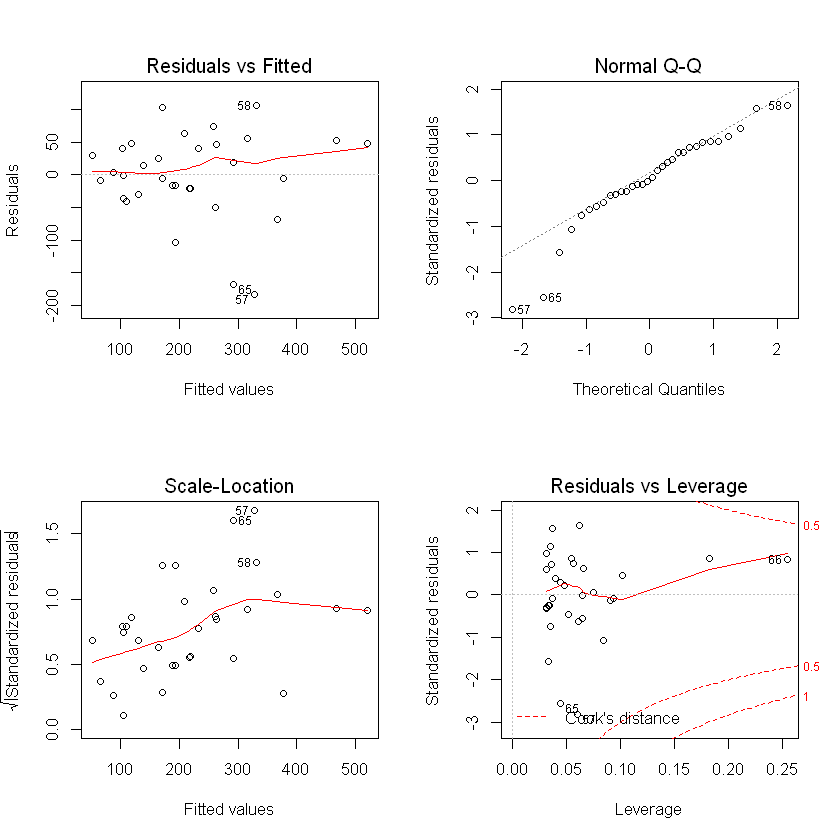

In [20]:
fit.NZ <- lm(area~width,data=fjords.NZ[!(fjords.NZ$ID %in% c('62')),])
summary(fit.NZ)

par(mfrow=c(2,2))
plot(fit.NZ)
par(mfrow=c(1,1))

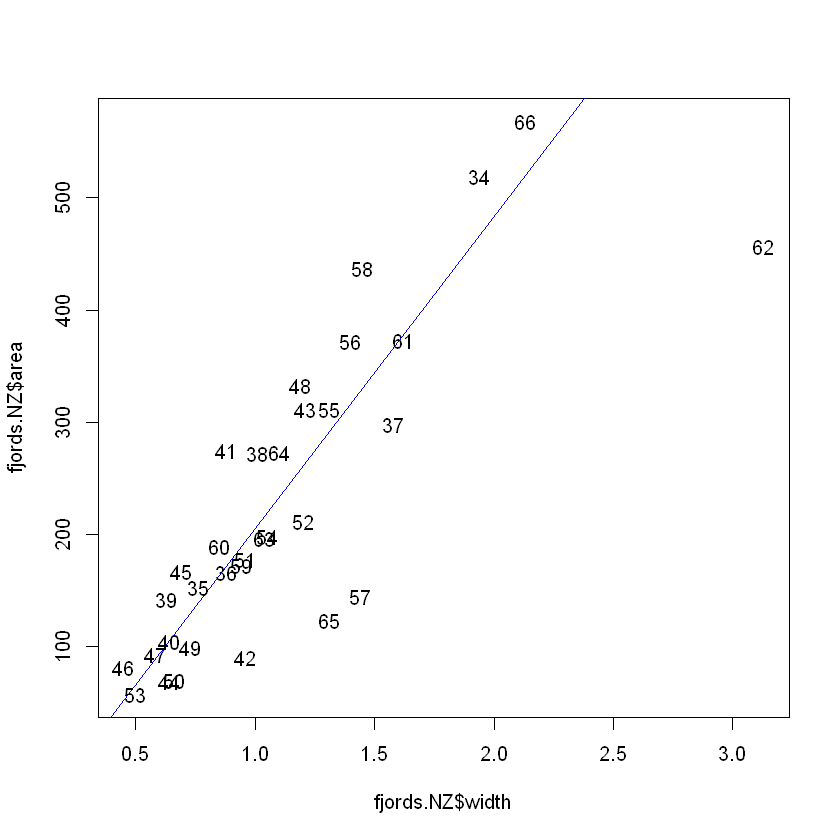

In [60]:
# Plot NZ lm line of fit
plot(fjords.NZ$area~fjords.NZ$width,type="n")
abline(fit.NZ, col="blue")
text(area~width,data=fjords.NZ, labels =fjords.NZ$ID)

#### Anova (nested f test) to compare with previous model

In [32]:
anova(lm(area~width+I(width^2),data=fjords.NZ[!(fjords.NZ$ID %in% c('62')),]),lm(area~width,data=fjords.NZ[!(fjords.NZ$ID %in% c('62')),]))

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
29,130264.1,NA,NA,NA,NA
30,134521.8,-1,-4257.726,0.9478747,0.3383123



Call:
lm(formula = area ~ width + log(width), data = fjords.NZ[!(fjords.NZ$ID %in% 
    c("62")), ])

Residuals:
     Min       1Q   Median       3Q      Max 
-180.104  -27.076   -2.371   39.823  108.928 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   -179.5      146.8  -1.223  0.23136   
width          377.5      136.3   2.770  0.00968 **
log(width)    -107.3      143.9  -0.746  0.46177   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 67.46 on 29 degrees of freedom
Multiple R-squared:  0.7541,	Adjusted R-squared:  0.7372 
F-statistic: 44.47 on 2 and 29 DF,  p-value: 1.465e-09


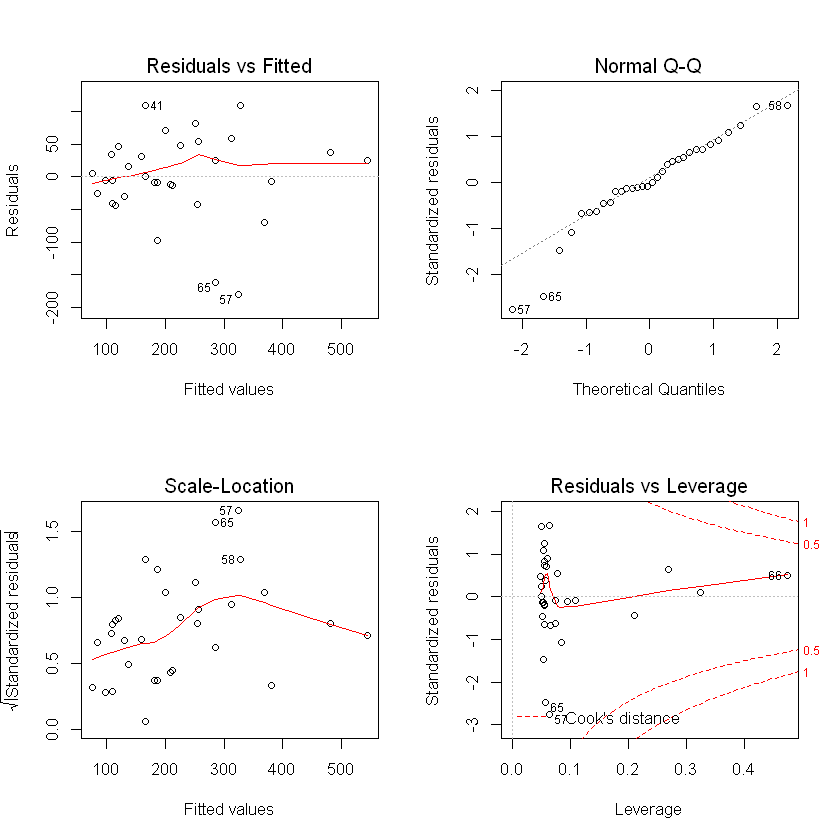

In [18]:
fit.NZ <- lm(area~width+log(width),data=fjords.NZ[!(fjords.NZ$ID %in% c('62')),])
summary(fit.NZ)

par(mfrow=c(2,2))
plot(fit.NZ)
par(mfrow=c(1,1))

## Robust regression
### rlm - NZ ($width$) 
$ area = -45.6781 + 254.7625*width$  
Residual standard error: 60.04

In [7]:
library(MASS)
library(sfsmisc)
fit <- rlm(area~width,data=fjords.NZ)

#https://en.wikipedia.org/wiki/Wald_test
f.robftest(fit, var="width")

summary(fit)


	robust F-test (as if non-random weights)

data:  from rlm(formula = area ~ width, data = fjords.NZ)
F = 103.88, p-value = 2.03e-11
alternative hypothesis: true width is not equal to 0



Call: rlm(formula = area ~ width, data = fjords.NZ)
Residuals:
     Min       1Q   Median       3Q      Max 
-295.229  -40.499   -9.184   38.539  113.072 

Coefficients:
            Value    Std. Error t value 
(Intercept) -45.6781  26.1781    -1.7449
width       254.7625  21.1519    12.0444

Residual standard error: 60.04 on 31 degrees of freedom

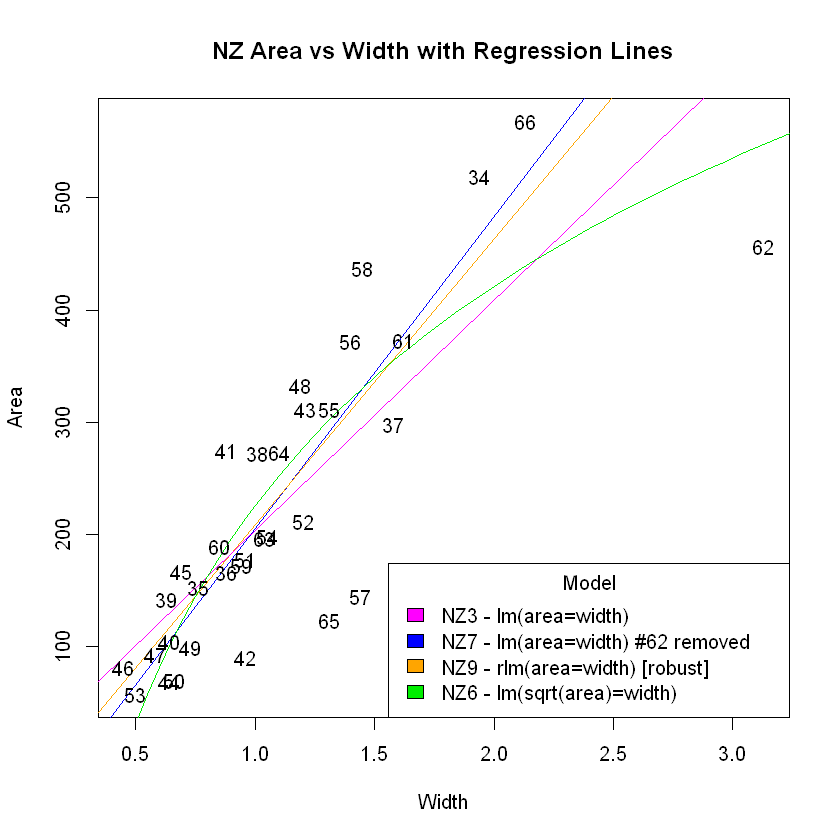

In [19]:
library(MASS)

# Plot NZ lm line of fit
plot(fjords.NZ$area~fjords.NZ$width,type="n",
     ylab="Area", xlab="Width", main="NZ Area vs Width with Regression Lines")
abline(lm(area~width,data=fjords.NZ[!(fjords.NZ$ID %in% c('62')),]), col="blue")
abline(rlm(area~width,data=fjords.NZ), col="orange")
abline(lm(area~width,data=fjords.NZ), col="magenta")

density <- seq(0,4,.05)
pr <- predict(lm(area~log(width),data=fjords.NZ[!(fjords.NZ$ID %in% c('62')),]),data.frame(width=density))
lines(density,pr,col="green2")

text(area~width,data=fjords.NZ, labels =fjords.NZ$ID)

par(xpd=TRUE)

legend("bottomright", c("NZ3 - lm(area=width)","NZ7 - lm(area=width) #62 removed","NZ9 - rlm(area=width) [robust]","NZ6 - lm(sqrt(area)=width)"), fill=c("magenta","blue", "orange","green2"), 
      title = "Model")
par(xpd=FALSE)

## Box Cox transformations
For a good explanation of Box Cox power transformations have a look at this website:  
http://www.isixsigma.com/tools-templates/normality/making-data-normal-using-box-cox-power-transformation/

Basically, lambda gives you the power of the transformation you should use.  
#### The most common are: 
+ lambda = 1     No transformation
+ lambda = 0     Log transformation
+ lambda = 0.5   Square root transformation
+ lambda = -1    Reciprocal (1/X)


Call:
lm(formula = area ~ width, data = fjords.NZ[!(fjords.NZ$ID %in% 
    c("62")), ])

Residuals:
     Min       1Q   Median       3Q      Max 
-183.010  -23.135    1.784   47.440  106.207 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -72.86      33.15  -2.198   0.0358 *  
width         278.25      29.38   9.471  1.6e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 66.96 on 30 degrees of freedom
Multiple R-squared:  0.7494,	Adjusted R-squared:  0.741 
F-statistic: 89.71 on 1 and 30 DF,  p-value: 1.595e-10


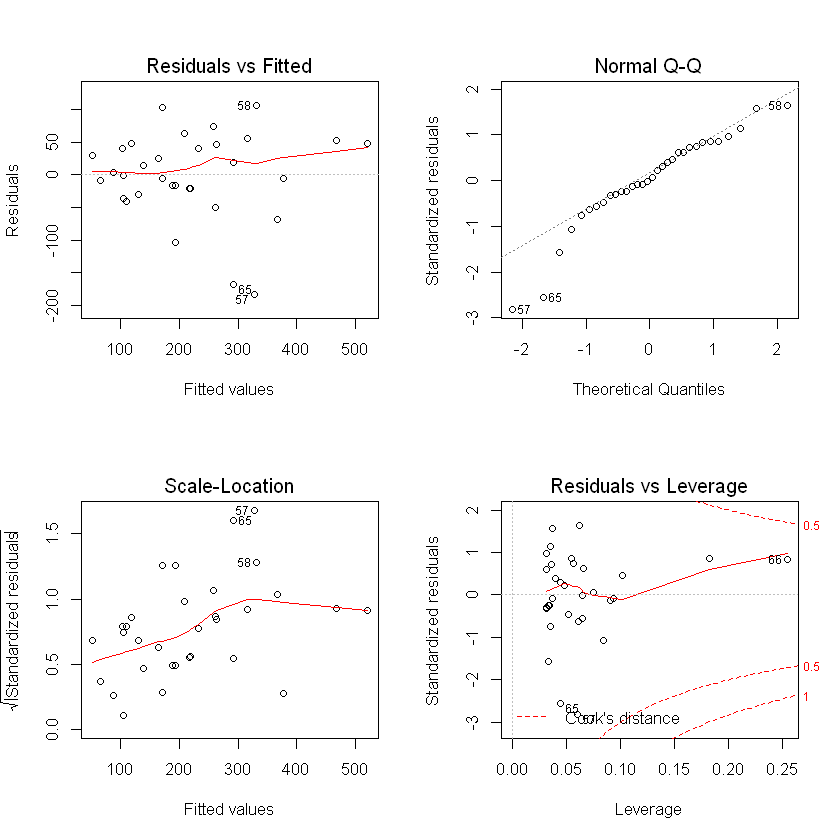

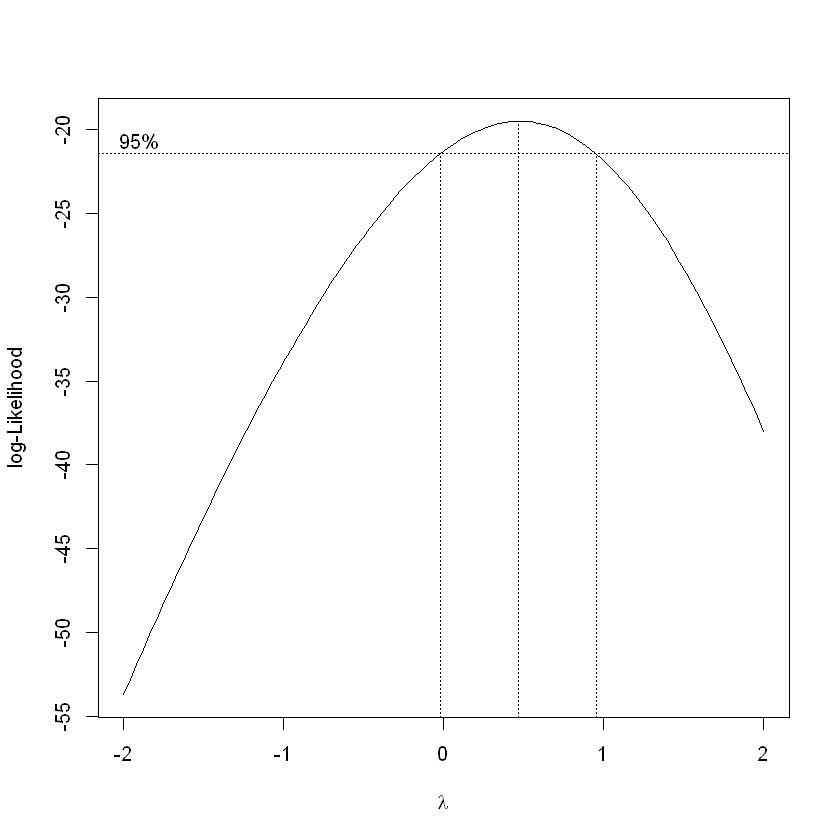

In [58]:
fit.NZ <- lm(area~width,data=fjords.NZ[!(fjords.NZ$ID %in% c('62')),])
summary(fit.NZ)

par(mfrow=c(2,2))
plot(fit.NZ)
par(mfrow=c(1,1))
boxcox(area~width,data=fjords.NZ[!(fjords.NZ$ID %in% c('62')),])

## sqrt


Call:
lm(formula = sqrt(area) ~ width, data = fjords.NZ[!(fjords.NZ$ID %in% 
    c("62")), ])

Residuals:
    Min      1Q  Median      3Q     Max 
-5.6511 -1.0782 -0.0036  1.5995  3.9185 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    4.800      1.132    4.24 0.000197 ***
width          8.948      1.003    8.92 6.11e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.287 on 30 degrees of freedom
Multiple R-squared:  0.7262,	Adjusted R-squared:  0.717 
F-statistic: 79.56 on 1 and 30 DF,  p-value: 6.115e-10


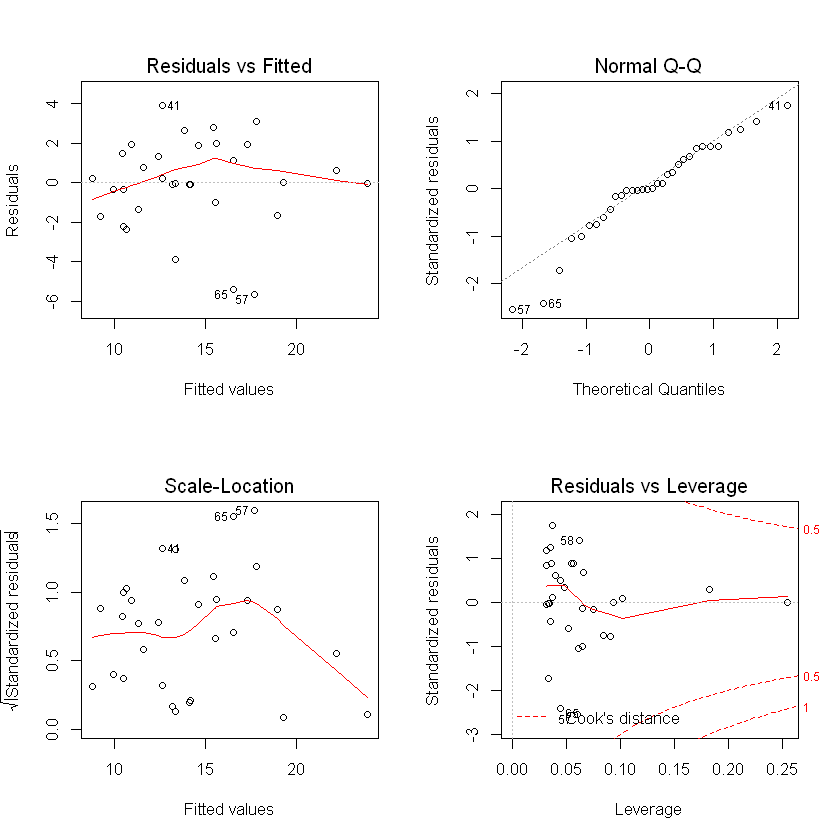

In [72]:
fit.NZ <- lm(sqrt(area)~width,data=fjords.NZ[!(fjords.NZ$ID %in% c('62')),])
summary(fit.NZ)

par(mfrow=c(2,2))
plot(fit.NZ)
par(mfrow=c(1,1))

Lower adjusted r^squared

## log


Call:
lm(formula = log(area) ~ width, data = fjords.NZ[!(fjords.NZ$ID %in% 
    c("62")), ])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.72056 -0.17776  0.07296  0.27261  0.61051 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.9253     0.1758  22.330  < 2e-16 ***
width         1.2296     0.1558   7.893 8.27e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3551 on 30 degrees of freedom
Multiple R-squared:  0.675,	Adjusted R-squared:  0.6641 
F-statistic:  62.3 on 1 and 30 DF,  p-value: 8.269e-09


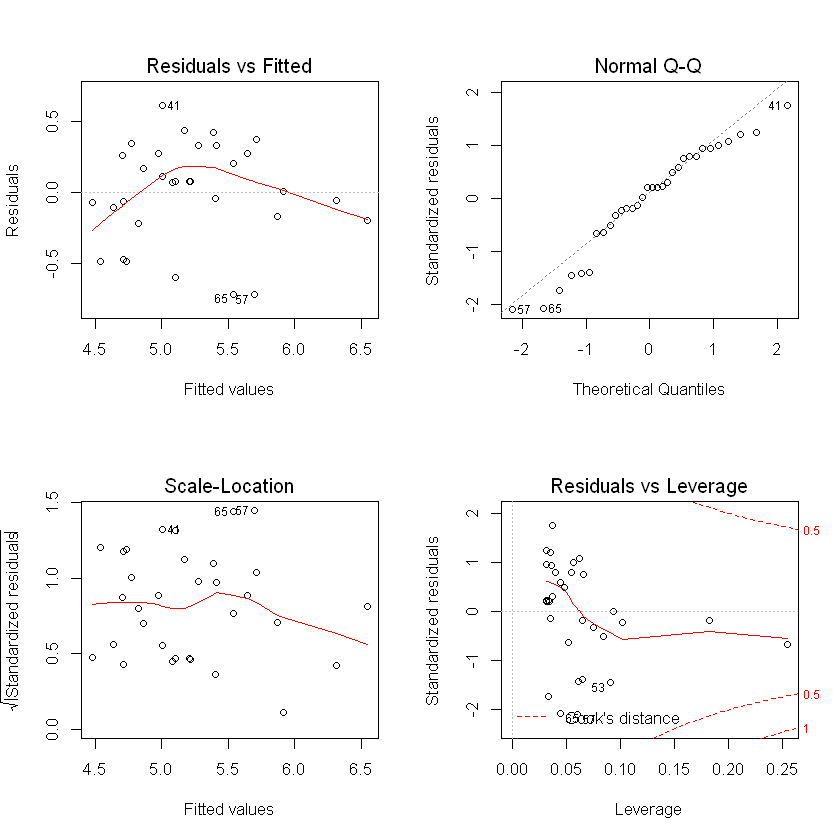

In [73]:
fit.NZ <- lm(log(area)~width,data=fjords.NZ[!(fjords.NZ$ID %in% c('62')),])
summary(fit.NZ)

par(mfrow=c(2,2))
plot(fit.NZ)
par(mfrow=c(1,1))


Call:
lm(formula = 1/area ~ width, data = fjords.NZ[!(fjords.NZ$ID %in% 
    c("62")), ])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.004083 -0.002057 -0.001321  0.001534  0.006953 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.014022   0.001405   9.983 4.76e-11 ***
width       -0.007167   0.001245  -5.758 2.75e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.002837 on 30 degrees of freedom
Multiple R-squared:  0.525,	Adjusted R-squared:  0.5091 
F-statistic: 33.15 on 1 and 30 DF,  p-value: 2.747e-06


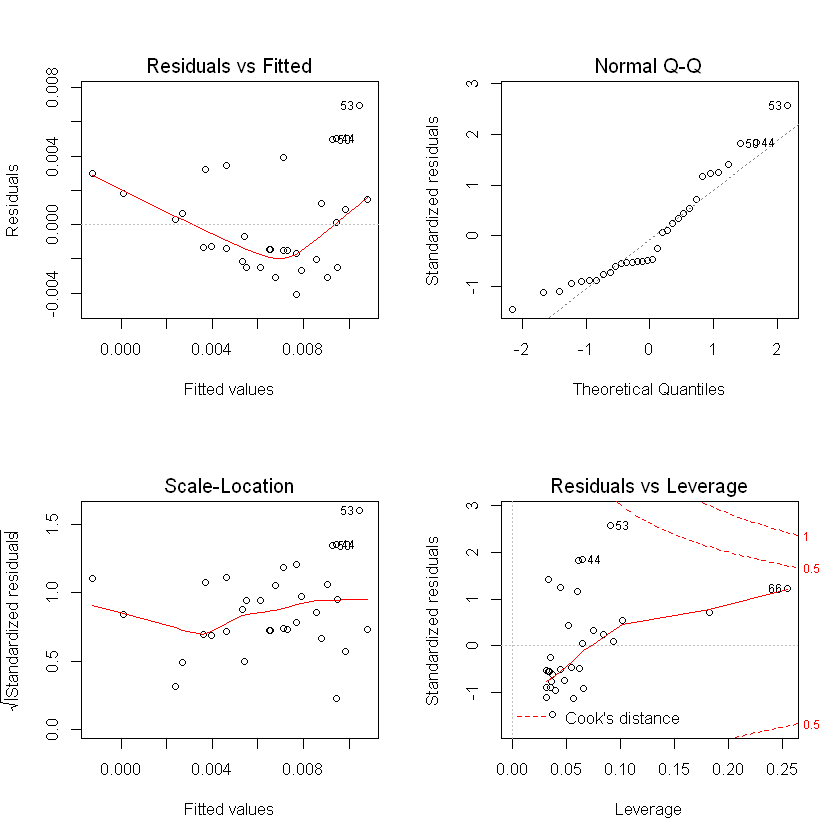

In [74]:
fit.NZ <- lm(1/area~width,data=fjords.NZ[!(fjords.NZ$ID %in% c('62')),])
summary(fit.NZ)

par(mfrow=c(2,2))
plot(fit.NZ)
par(mfrow=c(1,1))

**DON'T** box cox after transformation